# Projet 4 : Anticiper les besoins en consommation électrique de bâtiments
*Pierre-Eloi Ragetly*

Ce projet fait parti du parcours *DataScientist* d'OpenClassrooms.

L'objectif principal est de trouver un modèle permettant de prédire **les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l'habitation.**

Pour cela nous disposons des données de la ville de Seattle pour les années 2015 et 2016. Ces données sont à récupérer sur le site kaggle.

# Partie II : Feature Engineering

Ce notebook a pour but de présenter le travail effectué sur l'ingénierie de variables. C'est à dire toutes les transformations effectuées sur les variables afin d'améliorer les performances du modèle. Les données nettoyées (cf Partie I), seront utilisées.

De plus, Un premier tri parmi les variables sera effectué. Celles qui ne seront clairement pas pertinentes pour l'exercice de modélisation, par exemple l'adresse des bâtiments, seront écartées.

In [1]:
# Import des librairies usuelles
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import os

In [2]:
# Change some default parameters of matplotlib using seaborn
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'axes.titleweight': 'bold'})
sns.set(style='ticks')
current_palette = sns.color_palette('RdBu')
sns.set_palette(current_palette)

In [3]:
data_cleaned = pd.read_csv('data/data_cleaned.csv')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-des-variables-clés" data-toc-modified-id="Analyse-des-variables-clés-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse des variables clés</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-variables-à-prédire" data-toc-modified-id="Analyse-des-variables-à-prédire-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Analyse des variables à prédire</a></span></li><li><span><a href="#Analyse-de-l'ENERGY-STAR-Score" data-toc-modified-id="Analyse-de-l'ENERGY-STAR-Score-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analyse de l'ENERGY STAR Score</a></span></li></ul></li><li><span><a href="#Traitement-des-variables-quantitatives" data-toc-modified-id="Traitement-des-variables-quantitatives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Traitement des variables quantitatives</a></span><ul class="toc-item"><li><span><a href="#Traitement-des-variables-de-consommation" data-toc-modified-id="Traitement-des-variables-de-consommation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Traitement des variables de consommation</a></span></li><li><span><a href="#Traitement-des-variables-de-superficie" data-toc-modified-id="Traitement-des-variables-de-superficie-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Traitement des variables de superficie</a></span></li></ul></li><li><span><a href="#Traitement-des-variables-liées-au-type-d'utilisation-des-bâtiments" data-toc-modified-id="Traitement-des-variables-liées-au-type-d'utilisation-des-bâtiments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Traitement des variables liées au type d'utilisation des bâtiments</a></span><ul class="toc-item"><li><span><a href="#Création-d'une-table-d'association" data-toc-modified-id="Création-d'une-table-d'association-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Création d'une table d'association</a></span></li><li><span><a href="#Harmonisation-des-utilisations" data-toc-modified-id="Harmonisation-des-utilisations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Harmonisation des utilisations</a></span></li><li><span><a href="#Traitement-des-données-manquantes" data-toc-modified-id="Traitement-des-données-manquantes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Traitement des données manquantes</a></span></li><li><span><a href="#Surface-allouée-à-chaque-utilisation" data-toc-modified-id="Surface-allouée-à-chaque-utilisation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Surface allouée à chaque utilisation</a></span></li><li><span><a href="#Encoding-des-utilisations" data-toc-modified-id="Encoding-des-utilisations-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Encoding des utilisations</a></span></li></ul></li><li><span><a href="#Traitement-de-la-variable-qualitative-'Neighborhood'" data-toc-modified-id="Traitement-de-la-variable-qualitative-'Neighborhood'-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Traitement de la variable qualitative 'Neighborhood'</a></span></li><li><span><a href="#Traitement-des-données-manquantes" data-toc-modified-id="Traitement-des-données-manquantes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Traitement des données manquantes</a></span></li><li><span><a href="#Sélection-de-variables" data-toc-modified-id="Sélection-de-variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sélection de variables</a></span></li><li><span><a href="#Création-d'un-pipeline" data-toc-modified-id="Création-d'un-pipeline-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Création d'un pipeline</a></span></li></ul></div>

## Analyse des variables clés

### Analyse des variables à prédire

La première grandeur que nous cherchons à prédire est l'émission de CO2. Cette grandeur est renseignée dans nos jeux de données par la variable **TotalGHGEmissions**.

La deuxième est la consommation totale d'énergie, elle est renseignée par la variable **SiteEnergyUse(kBtu)**. Nous regarderons aussi sa version normalisée **SiteEnergyUse(kBtu)WN**. Ce WN veut dire *Weather Normalized*, il s'agit de données corrigées basées sur la différence entre la température de l'année en cours et la température moyenne de ces trente dernières années.

Commençons par voir la distribution de ces variables à l'aide d'un histogramme.

In [4]:
df = data_cleaned.copy()
df.set_index('OSEBuildingID', inplace=True)

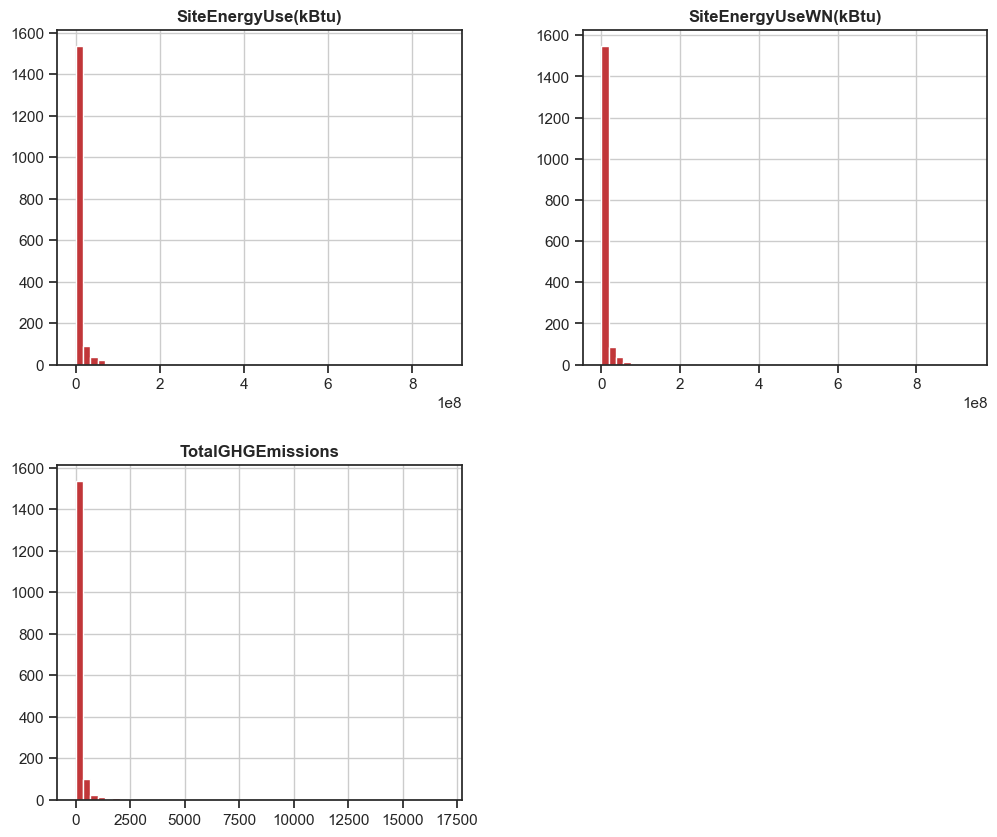

In [5]:
df[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']].hist(bins=50, figsize=(12, 10))
folder_path=os.path.join("charts")
if not os.path.isdir(folder_path):
    os.makedirs(folder_path)
plt.savefig("charts/targets_hist.png", bbox_inches = "tight")
plt.show()

Nous constatons que la distribution est fortement asymétrique pour les deux variables. La forme s'apparente plus à une distribution log normale que normale. Or, en général les algorithmes de Machine Learning (ML) sont plus performants quand les données suivent une distribution normale. Appliquons le log sur les deux variables, et regardons si on obtient une distribution un peu plus proche d'une cloche, forme typique de la distribution normale.

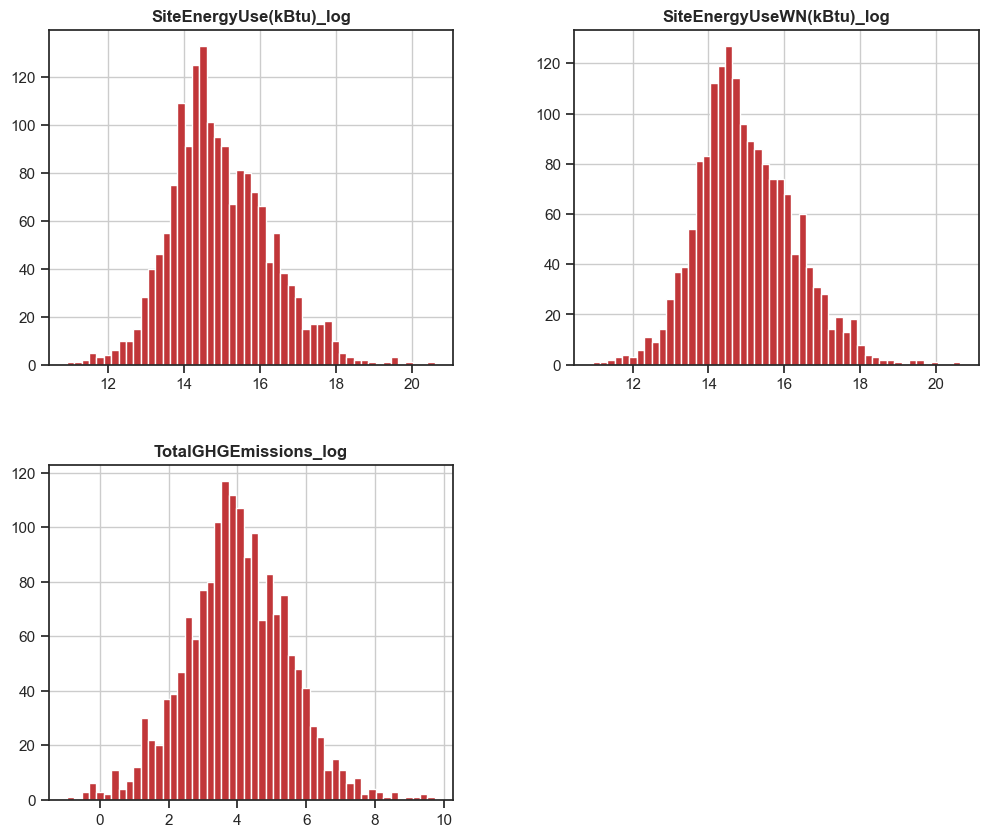

In [6]:
df['SiteEnergyUse(kBtu)_log'] = np.log(df['SiteEnergyUse(kBtu)'])
df['SiteEnergyUseWN(kBtu)_log'] = np.log(df['SiteEnergyUseWN(kBtu)'])
df['TotalGHGEmissions_log'] = np.log(df['TotalGHGEmissions'])
df[['TotalGHGEmissions_log', 'SiteEnergyUseWN(kBtu)_log', 'SiteEnergyUse(kBtu)_log']].hist(bins=50, figsize=(12, 10))
plt.savefig("charts/targets_log_hist.png", bbox_inches = "tight")
plt.show()

C'est nettement mieux. **Nous entrainerons donc nos modèles sur le logarithme de ces variables. Puis nous appliquerons l'exponentielle sur les prédictions pour obtenir les bonnes valeurs.**

### Analyse de l'ENERGY STAR Score

Comme nous cherchons aussi à évaluer l'intérêt de l'**ENERGY STAR Score**, il serait pertinent de regarder cette dernière plus en détail avant de nous occuper des autres variables.

Dans notre jeu de donnée, ce score est renseigné par la variable *ENERGYSTARScore*.

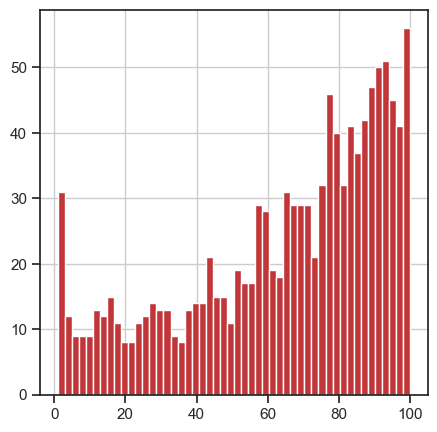

In [7]:
df['ENERGYSTARScore'].hist(bins=50, figsize=(5, 5))
plt.savefig("charts/energystar_hist.png", bbox_inches = "tight")
plt.show()

Nous observons une distribution asymétrique, presque triangulaire. La distribution semble fortement éloignée de celles des variables cibles. Ceci peut être dû au fait que l'Énergie Star Score mesure l'efficacité énergétique. Or, pour mesurer cette dernière il nécessaire de prendre en compte la surface des bâtiments. il serait donc plus pertinent de comparer l'Énergie Star non pas directement à la consommation (ou émission) mais à l'intensité de consommation (ou d'émission), ie. aux variables :
- SiteEUI(kBtu/sf)
- GHGEmissionsIntensity

Un moyen rapide et visuel de comparer ces trois variables est d'utiliser un pair plot, pour cela nous utiliserons la méthode `scatter_matrix()` du module pandas.plotting.

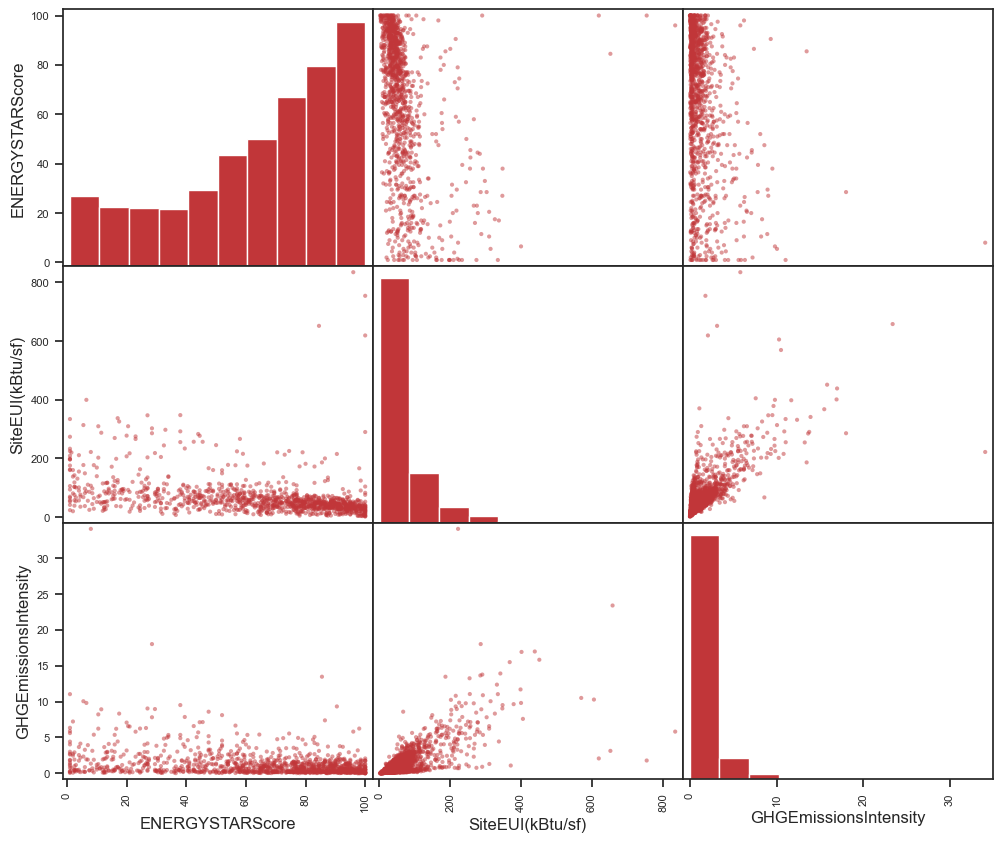

In [8]:
from pandas.plotting import scatter_matrix

features = ['ENERGYSTARScore','SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']
scatter_matrix(df[features], figsize=(12, 10))
plt.savefig("charts/energystar_pairplot.png", bbox_inches = "tight")
plt.show()

De nouveau nous obtenons des distributions très éloignées. Il serait donc assez surprenant que la variable ENERGY STAR soit clé pour prédire la consommation totale d'énergie ou bien encore l'émission de CO2. 

## Traitement des variables quantitatives

Nous commencerons pas analyser les variables quantitatives, ie. les variables les plus simples à traiter. 

### Traitement des variables de consommation

L'objectif final étant de nous passer des relevés de consommation annuels, nous allons devoir transformer un peu les variables liées à la consommation.

Par exemple au lieu de garder la consommation de chaque type d'énergie nous pourrions calculer la proportion que représente ces énergie dans la consommation totale. Nous pourrions aussi calculer le pourcentage de sources énergétiques primaires (fuel, gaz naturel) et secondaires (vapeur, électricité).

Dans la partie I, nous avions retiré la variable *OtherFuel(kBtu)* car :
1. Elle n'était pas présente dans les données de 2016
2. Elle était systématiquement supérieure aux valeurs obtenues en retranchant la somme des autres sources énergétiques à la consommation totale.

Nous allons commençons par recréer cette variable, en imposant que cette variable soit égale à 0 si la la somme des autres sources énergétiques est supérieure à la consommation totale. Comme on travaillera ensuite avec des ratio, ces cas ne seront pas problématique. Pour l'instant on veut juste éviter d'avoir une consommation négative.

In [9]:
att_conso = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

df['OtherFuel(kBtu)'] = df['SiteEnergyUse(kBtu)'] - df[att_conso].sum(axis=1)
# equalize all negative values to 0
cond = df['OtherFuel(kBtu)'] >= 0
df['OtherFuel(kBtu)'].where(cond, 0, inplace=True)

Nous pouvons maintenant caculer les ratio pour chaque énergie.

In [10]:
att_conso += ['OtherFuel(kBtu)']
for c in att_conso:
    name = c.replace("(kBtu)", "") + "_ratio"
    df[name] = df[c] / df[att_conso].sum(axis=1)

Puis les ratio pour les énergie primaires et secondaires.

In [11]:
df['Primary_ratio'] = df['NaturalGas_ratio'] + df['OtherFuel_ratio']
df['Secondary_ratio'] = df['SteamUse_ratio'] + df['Electricity_ratio']

### Traitement des variables de superficie

Dans nos jeux de données la superficie est désignée par GFA pour Gross Floor Area. Nous avons la superficie totale, ainsi que la superficie dédiée aux bâtiments et celle dédiée aux parkings. Pour les deux dernières, il serait plus pertinent d'avoir les ratio que les superficies absolues.

In [12]:
att_gfa = ['PropertyGFAParking', 'PropertyGFABuilding(s)']
for c in att_gfa:
    name = c + "_ratio"
    df[name] = df[c] / df[att_gfa].sum(axis=1)

## Traitement des variables liées au type d'utilisation des bâtiments

Nous avons plusieurs variables qui renseignent sur l'utilisation de chaque bâtiment. Certaines sont de type quantitatives et nous donnent la superficie allouées aux trois principales utilisations :
- LargestPropertyUseTypeGFA
- SecondLargestPropertyUseTypeGFA
- ThirdLargestPropertyUseTypeGFA

D'autres sont qualitatives et permettent de connaître le type d'utilisation :
- PrimaryPropertyType
- ListOfAllPropertyUseTypes
- LargestPropertyUseType
- SecondLargestPropertyUseType
- ThirdLargestPropertyUseType

Le but de cette section va être de créer de nouvelles variables qui viendront remplacer les variables listées ci-dessus. Elles permettront de faciliter le travail de modélisation sans perdre d'information. Pour ce faire, nous allons créer une variable par type d'utilisation présent dans *PrimaryPropertyType*. Puis, nous remplirons ces variables en calculant &ndash; à l'aide des trois variables quantitatives ci-dessus &ndash; le pourcentage de la superficie totale alloué à chaque utilisation.

### Création d'une table d'association

L'ensemble des utilisations possibles sont listées dans :
- PrimaryPropertyType
- ListOfAllPropertyUseTypes (qui sert de référence pour toutes les variables finissant par PropertyUseType)

Regardons si ces deux variables possèdent les mêmes modalités.

In [13]:
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    295
Other                          260
Warehouse                      187
Large Office                   173
K-12 School                    137
Mixed Use Property             109
Retail Store                    92
Hotel                           76
Worship Facility                70
Distribution Center             53
Senior Care Community           45
Medical Office                  42
Supermarket / Grocery Store     40
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Non-Refrigerated Warehouse       2
Restaurant\n                     1
Name: PrimaryPropertyType, dtype: int64

In [14]:
# Retreive all Property use types
list_of_lists = df['ListOfAllPropertyUseTypes'].dropna().str.split(', ')
values = [item for sublist in list_of_lists for item in sublist]
# Keep only unique items
X = np.array(values)
list_of_use_types = np.unique(X)
print(len(list_of_use_types))
list_of_use_types

72


array(['Adult Education', 'Automobile Dealership', 'Bank Branch',
       'Bar/Nightclub', 'College/University',
       'Convenience Store without Gas Station', 'Convention Center',
       'Courthouse', 'Data Center', 'Distribution Center', 'Dry Cleaning',
       'Enclosed Mall', 'Energy/Power Station', 'Fast Food Restaurant',
       'Financial Office', 'Fire Station',
       'Fitness Center/Health Club/Gym', 'Food Sales', 'Food Service',
       'Hospital (General Medical & Surgical)', 'Hotel', 'K-12 School',
       'Laboratory', 'Library', 'Lifestyle Center', 'Locksmith',
       'Manufacturing/Industrial Plant', 'Medical Office',
       'Movie Theater', 'Multifamily Housing', 'Museum',
       'Non-Refrigerated Warehouse', 'Office', 'Other',
       'Other - Education', 'Other - Entertainment/Public Assembly',
       'Other - Lodging/Residential', 'Other - Mall',
       'Other - Public Services', 'Other - Recreation',
       'Other - Restaurant/Bar', 'Other - Services',
       'Other - T

Nous pouvons remarquer que les types d'utilisation des deux variables ne sont pas les mêmes. Nous allons créer une table d'association qui permettra de passer d'une variable à l'autre.

Pour cela nous allons créer un nouveau *DataFrame* à partir des deux variables *LargestPropertyUseType* et *PrimaryPropertyType*. Puis nous supprimerons les doublons à l'aide de la méthode `drop_duplicates()` de pandas.

In [15]:
associative_df = df[['LargestPropertyUseType', 'PrimaryPropertyType']].dropna()
associative_df = (associative_df.rename(columns={'LargestPropertyUseType': 'PropertyUseType'})
                                .drop_duplicates()
                                .reset_index(drop=True))
associative_df

,PropertyUseType,PrimaryPropertyType
0,Office,Small- and Mid-Sized Office
1,Office,Large Office
2,Medical Office,Medical Office
3,Other,Other
4,Retail Store,Retail Store
...,...,...
78,Other - Restaurant/Bar,Restaurant
79,Senior Care Community,Mixed Use Property
80,Pre-school/Daycare,Other
81,Prison/Incarceration,Other


Vérifions que chaque entrée de *LargestPropertyUseType* ne possède qu'une valeur pour *PrimaryPropertyType*.

In [16]:
n = associative_df[associative_df['PropertyUseType'].duplicated(keep=False)].shape[0]
print(n)

49


Nous constatons que 49 valeurs de *LargestPropertyUseType* peuvent être associées à plusieurs valeurs pour *PrimaryPropertyType*. Comme c'est un nombre assez limité nous pouvons regarder ces individus plus en détail et ensuite choisir quelle valeur pour PrimaryPropertyType nous voulons garder.

In [17]:
idx = associative_df[associative_df['PropertyUseType'].duplicated(keep=False)].index
associative_df.loc[idx].sort_values('PropertyUseType')

,PropertyUseType,PrimaryPropertyType
76,Bank Branch,Mixed Use Property
63,Bank Branch,Other
60,Distribution Center,Mixed Use Property
33,Distribution Center,Distribution Center
70,Fitness Center/Health Club/Gym,Mixed Use Property
15,Fitness Center/Health Club/Gym,Other
66,Hotel,Mixed Use Property
11,Hotel,Hotel
45,Laboratory,Laboratory
39,Laboratory,Mixed Use Property


Nous remarquons que la majorité des problèmes viennent de la modalité *Mixed Use Property*. Il s'agit d'un terme générique dans lequel on peut tout mettre. Il serait préférable de le remplacer par un terme plus explicite.

Il est intéressant de noter que bon nombre des catégories se ressemblent, et que la quasi totalité des valeurs présentes dans la variable *LargestPropertyUseType* et non présentes dans la variable *PrimaryPropertyType* peuvent être regroupées dans la catégorie **other**. Avec cependant une exception pour les bureaux, définis par la modalité **Office** pour *LargestPropertyUseType*, alors que pour *PrimaryPropertyType* ils sont définis par **Small- and Mid-Sized Office** et **Large Office**. Il est assez peu pertinent de distinger les bureaux par taille, sachant que nous avons déjà la variable 'PropertyGFATotal' qui permet de le faire. Nous regrouperons donc tous les bureaux dans la catégorie **Office**.

In [18]:
# drop the \n string at the end of a couple of PrimaryPropertyType modalities
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace("\n", "")
# replace "Restaurant" by "Restaurant/Bar"
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace("Restaurant", "Restaurant/Bar")
# gather "Small- and Mid-Sized Office" and "Large Office" modalities in a unique "Office" modality.
office_l = ['Small- and Mid-Sized Office', 'Large Office']
idx = df[df['PrimaryPropertyType'].isin(office_l)].index
df.loc[idx, 'PrimaryPropertyType'] = "Office"
# Recreate the associative array
associative_df = df[['LargestPropertyUseType', 'PrimaryPropertyType']].dropna()
associative_df = (associative_df.rename(columns={'LargestPropertyUseType': 'PropertyUseType'})
                                .drop_duplicates()
                                .reset_index(drop=True))
# drop the "Mixed Use Property" modality
idx = associative_df[associative_df['PrimaryPropertyType']=="Mixed Use Property"].index
associative_df.drop(index=idx, inplace=True)

In [19]:
n = associative_df[associative_df['PropertyUseType'].duplicated(keep=False)].shape[0]
print(n)

4


Il reste encore 4 doublons, regardons les dans le détail.

In [20]:
idx = associative_df[associative_df['PropertyUseType'].duplicated(keep=False)].index
associative_df.loc[idx].sort_values('PropertyUseType')

,PropertyUseType,PrimaryPropertyType
4,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse
20,Non-Refrigerated Warehouse,Warehouse
2,Other,Other
53,Other,Retail Store


Pour *Other* nous garderons de façon évidente *Other*, quant à *Non-Refrigerated Warehouse* nous garderons *Warehouse* qui est plus générique.

In [21]:
idx = [4, 53]
associative_df.drop(index=idx, inplace=True)
associative_df.reset_index(drop=True, inplace=True)

Il reste à vérifier que les catégories de *SecondLargestPropertyUseType* et *ThirdLargestPropertyUseType* sont bien toutes présentes dans la table d'association.

In [22]:
list_1 = associative_df['PropertyUseType'].tolist()
list_2 = df['SecondLargestPropertyUseType'].dropna().unique().tolist()
list_3 = df['ThirdLargestPropertyUseType'].dropna().unique().tolist()
list_all = list_2 + [i for i in list_3 if i not in list_2]
missing_cat = [i for i in list_all if i not in list_1]
print(len(missing_cat))
missing_cat

9


['Vocational School',
 'Swimming Pool',
 'Convenience Store without Gas Station',
 'Enclosed Mall',
 'Multifamily Housing',
 'Bar/Nightclub',
 'Food Sales',
 'Other - Technology/Science',
 'Fast Food Restaurant']

Neuf catégories ne sont pas référencées dans la table d'association, nous devons les ajouter.

In [23]:
missing_cat = ['Vocational School',
               'Swimming Pool',
               'Convenience Store without Gas Station',
               'Enclosed Mall',
               'Multifamily Housing',
               'Bar/Nightclub',
               'Food Sales',
               'Other - Technology/Science',
               'Fast Food Restaurant']
cat_to_be_added = ['Other',
                   'Other',
                   'Retail Store',
                   'Supermarket/Grocery Store',
                   'Multifamily Housing',
                   'Restaurant/Bar',
                   'Retail Store',
                   'Other',
                   'Restaurant/Bar']
extra_df = pd.DataFrame({'PropertyUseType': missing_cat,
                         'PrimaryPropertyType': cat_to_be_added})
associative_df = associative_df.append(extra_df, ignore_index=True, sort=True)

In [24]:
associative_df

,PrimaryPropertyType,PropertyUseType
0,Office,Office
1,Medical Office,Medical Office
2,Other,Other
3,Retail Store,Retail Store
4,K-12 School,K-12 School
...,...,...
60,Multifamily Housing,Multifamily Housing
61,Restaurant/Bar,Bar/Nightclub
62,Retail Store,Food Sales
63,Other,Other - Technology/Science


### Harmonisation des utilisations

Nous pouvons maintenant utiliser la table d'association pour transformer les variables :
- LargestPropertyUseType
- SecondLargestPropertyUseType
- ThirdLargestPropertyUseType

In [25]:
cols_UseType = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
for c in cols_UseType:
    df[c] = (pd.merge(df[c], associative_df, how='left', left_on=c, right_on='PropertyUseType')
               .PrimaryPropertyType
               .tolist())

### Traitement des données manquantes

In [26]:
cols = ['PrimaryPropertyType',
        'LargestPropertyUseType',
        'SecondLargestPropertyUseType',
        'ThirdLargestPropertyUseType',
        'LargestPropertyUseTypeGFA',
        'SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseTypeGFA']
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 325 to 50226
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              1705 non-null   object 
 1   LargestPropertyUseType           1693 non-null   object 
 2   SecondLargestPropertyUseType     873 non-null    object 
 3   ThirdLargestPropertyUseType      351 non-null    object 
 4   LargestPropertyUseTypeGFA        1693 non-null   float64
 5   SecondLargestPropertyUseTypeGFA  875 non-null    float64
 6   ThirdLargestPropertyUseTypeGFA   356 non-null    float64
dtypes: float64(3), object(4)
memory usage: 186.6+ KB


Nous constatons la présence de données manquantes. Pour les variables *SecondLargestPropertyUseType* et *ThirdLargestPropertyUseType*, nous pouvons penser que si ces données ne sont pas renseignées, c'est tout simplement parce que le bâtiment ne possède pas de 2ème ou 3ème utilisation. Nous pouvons donc imputer les surfaces associées par 0.

Pour la variable *LargestPropertyUseType*, nous pouvons utiliser la variable *PrimaryPropertyType* pour imputer les données manquantes. Pour la surface, nous utiliserons la valeur données par *PropertyGFATotal*.

In [27]:
# impute 'SecondLargestPropertyUseTypeGFA' & 'ThirdLargestPropertyUseTypeGFA'
values={'SecondLargestPropertyUseTypeGFA': 0,
        'ThirdLargestPropertyUseTypeGFA': 0}
df.fillna(values, inplace=True)
# impute 'LargestPropertyUseType'
df['LargestPropertyUseType'].fillna(df['PrimaryPropertyType'], inplace=True)
# impute 'LargestPropertyUseTypeGFA'
df['LargestPropertyUseTypeGFA'].fillna(df['PropertyGFATotal'], inplace=True)

### Surface allouée à chaque utilisation

Ayant des bâtiments de taille différente, pour pouvoir les comparer il serait plus pertinent de connaître la proportion de la surface totale allouée à chaque utilisation, plutôt que la surface en elle même.

In [28]:
use_gfa = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
for c in use_gfa:
    name = c + "_ratio"
    df[name] = df[c] / df[use_gfa].sum(axis=1)

### Encoding des utilisations

Pour finir le traitement des variables liées à l'utilisation, nous allons créer autant de variables que de type d'utilisation possible, et nous utiliserons les trois variables ci dessous pour les renseigner :
- LargestPropertyUseTypeGFA_ratio
- SecondLargestPropertyUseTypeGFA_ratio
- ThirdLargestPropertyUseTypeGFA_ratio

In [29]:
cols_use = ['LargestPropertyUseType',
            'SecondLargestPropertyUseType',
            'ThirdLargestPropertyUseType']
use_gfa_ratio = ['LargestPropertyUseTypeGFA_ratio',
                 'SecondLargestPropertyUseTypeGFA_ratio',
                 'ThirdLargestPropertyUseTypeGFA_ratio']
list_cat = associative_df['PrimaryPropertyType'].unique().tolist()
for c in list_cat:
    df[c] = (df[cols_use[0]]==c)*df[use_gfa_ratio[0]] + \
            (df[cols_use[1]]==c)*df[use_gfa_ratio[1]] + \
            (df[cols_use[2]]==c)*df[use_gfa_ratio[2]]

## Traitement de la variable qualitative 'Neighborhood'

La variable *Neighborhood* est une variable qualitative, or les algorithmes d'apprentissage automatique préfèrent travailler sur des nombres. Il va donc falloir transformer les chaînes de caractères en nombres. Pour cela nous utiliser la librairie **Scikit-Learn**.

Nous pourrions utiliser la classe `OrdinalEncoder` de *sklearn.preprocessing* qui code chaque modalité par un nombre. Le problème avec cette représentation, c'est que les algorithmes vont condidérer que deux valeurs voisines sont plus semblables que deux valeurs éloignées. Pour régler ce problème on préfère généralement créer une variable binaire par modalité. C'est précisément ce que permet la classe `OneHotEncoder`*.

*Pour les versions de Scikit-Learn 0.2 et ultérieurs, OneHotEncoder peut s'appliquer directement sur des chaînes de caractères et non plus seulement sur des variables qualitatives à valeurs entières.

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
neighborhood_1hot = cat_encoder.fit_transform(df['Neighborhood'].values.reshape(-1, 1))
neighborhood_cat = cat_encoder.categories_[0].tolist()
df_1hot = pd.DataFrame(neighborhood_1hot.toarray(), columns=neighborhood_cat, index=df.index)
df = pd.concat([df, df_1hot], axis=1)

## Traitement des données manquantes

Il nous reste encore des données manquantes pour la variable : *NumberofFloors*

Nous remplacerons ces valeurs manquantes par la **médiane** en utilisant la classe `SimpleImputer` de *sklearn.impute*.

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(df['NumberofFloors'].values.reshape(-1, 1))
df['NumberofFloors'] = X

## Sélection de variables

Nombre de variables ne sont pas pertinentes pour modéliser la consommation en énergie ou l'émission de CO2. Elles viennent donc polluer le jeu de données et risque d'abaisser l'efficacité de notre modèle, il faut donc les écarter avant de procéder à l'entrainement des modèles.

Parmi elles nous allons trouver des variables renvoyant toutes la même donnée :
- DataYear
- ComplianceStatus
- City
- State

Nous avons aussi des variables qui pourraient s'apparenter à un identifiant. Ayant déja choisi comme identifiant *OSEBuildingID* (cf. Partie I), elles sont donc redondantes et peuvent être écartées sans risquer de perdre de l'information :
- PropertyName
- TaxParcelIdentificationNumber
- Address

D'autres n'auront clairement aucun lien avec les attributs que nous cherchons à modéliser :
- YearsENERGYSTARCertified
- DefaultData

Une variable contient très peu de valeurs renseignée, cinq en tout. De plus, il s'agit de texte, et est donc difficilement utilisable par les algorithmes d'apprentissage automatique classiques :
- Comments

Certaines sont redondantes :
- BuildingType (redondante avec PrimaryPropertyType, cf. Partie I)
- CouncilDistrictCode (redondante avec Neighborhood)
- ZipCode (redondante avec Neighborhood)

Enfin, de nombreuses variables ont été transformées. Les variable initiales (non transformées) n'ont plus d'intérêt et peuvent être écartées.

In [32]:
cols_to_del = ['DataYear',
               'ComplianceStatus',
               'City',
               'State',
               'PropertyName',
               'TaxParcelIdentificationNumber',
               'Address',
               'YearsENERGYSTARCertified',
               'DefaultData',
               'Comments',
               'BuildingType',
               'CouncilDistrictCode',
               'ZipCode',
               'SiteEUI(kBtu/sf)',
               'SiteEUIWN(kBtu/sf)',
               'SourceEUI(kBtu/sf)',
               'SourceEUIWN(kBtu/sf)',
               'GHGEmissionsIntensity',
               'SteamUse(kBtu)',
               'Electricity(kBtu)',
               'NaturalGas(kBtu)',
               'OtherFuel(kBtu)',
               'PropertyGFAParking',
               'PropertyGFABuilding(s)',
               'PrimaryPropertyType',
               'ListOfAllPropertyUseTypes',
               'LargestPropertyUseType',
               'SecondLargestPropertyUseType',
               'ThirdLargestPropertyUseType',
               'LargestPropertyUseTypeGFA',
               'SecondLargestPropertyUseTypeGFA',
               'ThirdLargestPropertyUseTypeGFA',
               'Neighborhood']
df.drop(columns=cols_to_del, inplace=True)

## Création d'un pipeline

Nous allons créer un *pipeline* qui permettra d'automatiser toutes les opérations décrites plus haut. Nous en profiterons pour ajouter une fonction permettant de normaliser les variables numériques.

In [33]:
from functions.feat_engineering import pipe_engineering

# Transform cleaned datasets
data_tr = pipe_engineering(data_cleaned)
# export in csv format the transformed datasets
data_tr.to_csv("data/data_tr.csv")